In [1]:
import pandas as pd

In [2]:
# Load CSV file with semicolon separator
df02 = pd.read_csv("msn_02_fuel_leak_signals_preprocessed.csv", sep=";")

# Prepping the dataset

In [3]:
# SETTING INDEX AS A DATETIME
df02['UTC_TIME'] = pd.to_datetime(df02['UTC_TIME'])
df02 = df02.set_index("UTC_TIME")

In [4]:
# Drop time, month, day, and year column because they are already in the UTC Time im assuming
df02 = df02.drop(columns=['time', 'month', 'day', 'year'])

In [5]:
df02.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 623580 entries, 2011-03-09 12:06:01 to 2011-03-10 17:27:27
Data columns (total 106 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   623580 non-null  object 
 1    Flight                                623580 non-null  object 
 2    ENGINE_RUNNING_1                      623580 non-null  bool   
 3    ENGINE_RUNNING_2                      623580 non-null  bool   
 4    ENGINE_RUNNING_3                      623580 non-null  bool   
 5    ENGINE_RUNNING_4                      623580 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    560658 non-null  float64
 7    FUEL_FLOW_1                           514937 non-null  float64
 8    FUEL_FLOW_2                           516594 non-null  float64
 9    FUEL_FLOW_3                           516599 non-null  float64
 10   FUEL_FLOW_4         

In [6]:
df02 = df02.drop_duplicates()

### Imputing Missing Value

In [7]:
# Check missing values percentage
missing_values = (df02.isnull().sum() / len(df02)) * 100
print(missing_values[missing_values > 0].sort_values(ascending=False))

APU_FUEL_FLOW_REQUEST_SIGNAL_1       69.517246
TRANSFER_MODE                        64.555553
FUEL_FLOW_4                           7.972556
FUEL_USED_4                           7.972191
FUEL_FLOW_1                           7.931434
FUEL_USED_1                           7.930155
FUEL_FLOW_2                           7.717417
FUEL_FLOW_3                           7.716503
FUEL_USED_2                           7.716320
FUEL_USED_3                           7.716137
SELECTED_GADIR_ALTITUDE_VALUE         0.076030
STATUS_FUEL_QTY_PART_UNUSABLE_LST     0.074933
STATUS_FUEL_QTY_PART_UNUSABLE_RST     0.074933
STATUS_FUEL_QTY_UNUSABLE_LST          0.073289
STATUS_FUEL_LEAK_DETECTED_VALID       0.073289
VALUE_FUEL_QTY_CC1                    0.073289
LEAK_DETECTION_LEAK_FLOW              0.073289
STATUS_FUEL_QTY_UNUSABLE_RST          0.073289
VALUE_FUEL_QTY_CC4                    0.073289
STATUS_OVERFLOW_RST                   0.073289
VALUE_FUEL_QTY_CC2                    0.073289
VALUE_FUEL_QT

In [8]:
# Assuming that the null values in LEAK_DETECTION_LEAK_FLOW are 0
#df02['LEAK_DETECTION_LEAK_FLOW'] = df02['LEAK_DETECTION_LEAK_FLOW'].fillna(0)

In [9]:
df02['TRANSFER_MODE'].unique()

array([nan,  0.,  6.,  1.,  3.])

In [10]:
df02['TRANSFER_MODE'].unique()

# Assuming that NaN in this case is also 0
df02['TRANSFER_MODE'] = df02['TRANSFER_MODE'].fillna(0)

In [11]:
df02['STATUS_FUEL_LEAK_DETECTED_VALID'].unique()
# Assuming that NaN in this case is also 0
df02['STATUS_FUEL_LEAK_DETECTED_VALID'] = df02['STATUS_FUEL_LEAK_DETECTED_VALID'].fillna(0)

In [12]:
df02['STATUS_FUEL_LEAK_DETECTED_VALID'].value_counts()

STATUS_FUEL_LEAK_DETECTED_VALID
1.0    546626
0.0       526
Name: count, dtype: int64

In [13]:
df02['LEAK_DETECTION_LEAK_FLOW'].isnull().sum()

401

In [14]:
leaks = df02[df02['LEAK_DETECTION_LEAK_FLOW'] != 0]
no_leaks = df02[df02['LEAK_DETECTION_LEAK_FLOW'] == 0]

# Count the number of leaks
num_leaks = leaks.shape[0]  # or len(leaks)

# Count the number of no leaks
num_no_leaks = no_leaks.shape[0]  # or len(no_leaks)

print("Number of leaks:", num_leaks)
print("Number of no leaks:", num_no_leaks)

Number of leaks: 421009
Number of no leaks: 126143


# EDA

In [15]:
df02['Flight'].nunique()

# Data from 42 flights

42

In [16]:
df02['LEAK_DETECTION_LEAK_FLOW'].describe()

count    546751.000000
mean        -58.231362
std        2513.778916
min      -82781.590000
25%        -137.614200
50%           0.000000
75%         125.410900
max       73028.340000
Name: LEAK_DETECTION_LEAK_FLOW, dtype: float64

Text(0.5, 1.0, 'Histogram of Fuel Leak Detection')

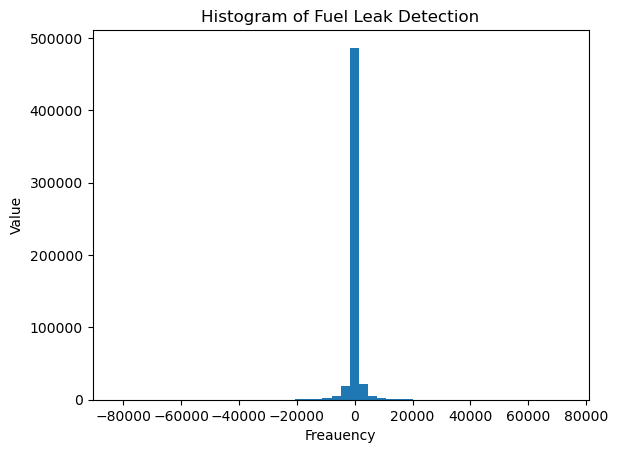

In [17]:
import matplotlib.pyplot as plt

plt.hist(df02['LEAK_DETECTION_LEAK_FLOW'], bins=50)
plt.xlabel("Freauency")
plt.ylabel("Value")
plt.title("Histogram of Fuel Leak Detection")

Text(0.5, 1.0, 'Histogram of Fuel On Board')

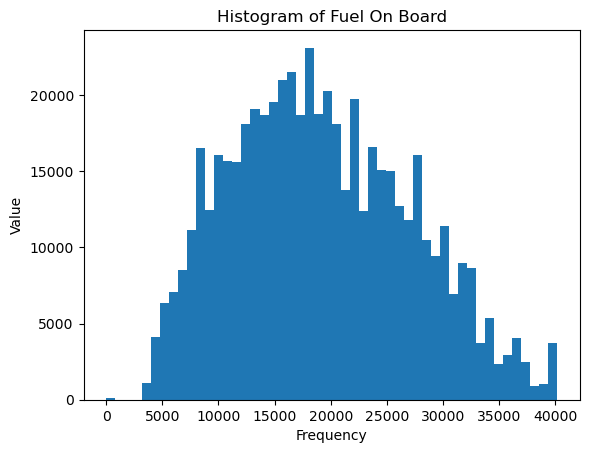

In [18]:
plt.hist(df02['VALUE_FOB'], bins=50)
plt.xlabel("Frequency")
plt.ylabel("Value")
plt.title("Histogram of Fuel On Board")

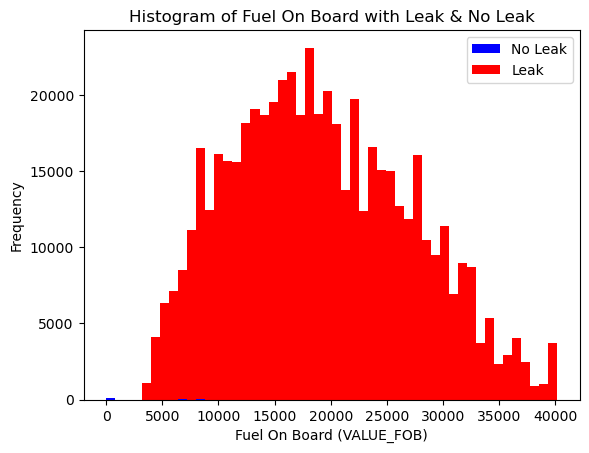

In [19]:
import matplotlib.pyplot as plt

# Filter data into two categories
leak_values = df02[df02['STATUS_FUEL_LEAK_DETECTED_VALID'] == 1]['VALUE_FOB']  # Fuel On Board when there's a leak
no_leak_values = df02[df02['STATUS_FUEL_LEAK_DETECTED_VALID'] == 0]['VALUE_FOB']  # Fuel On Board when no leak

# Plot histogram with stacking
plt.hist([no_leak_values, leak_values], bins=50, stacked=True, color=['blue', 'red'], label=['No Leak', 'Leak'])

# Labels and title
plt.xlabel("Fuel On Board (VALUE_FOB)")
plt.ylabel("Frequency")
plt.title("Histogram of Fuel On Board with Leak & No Leak")

# Add legend
plt.legend()

# Show plot
plt.show()


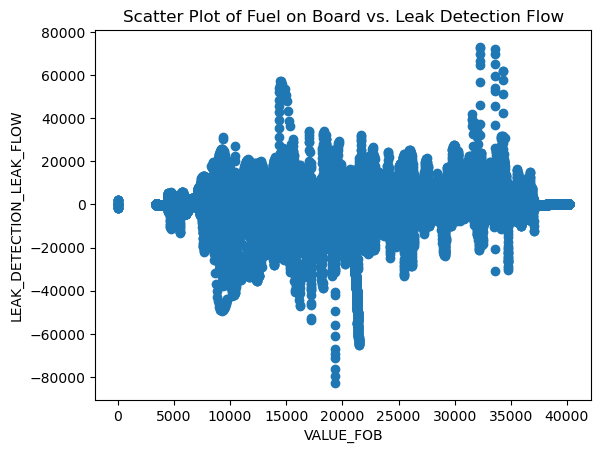

In [20]:
# Scatter plot
plt.scatter(df02['VALUE_FOB'], df02['LEAK_DETECTION_LEAK_FLOW'])
plt.xlabel("VALUE_FOB")  # X-axis label
plt.ylabel("LEAK_DETECTION_LEAK_FLOW")  # Y-axis label
plt.title("Scatter Plot of Fuel on Board vs. Leak Detection Flow")
plt.show()

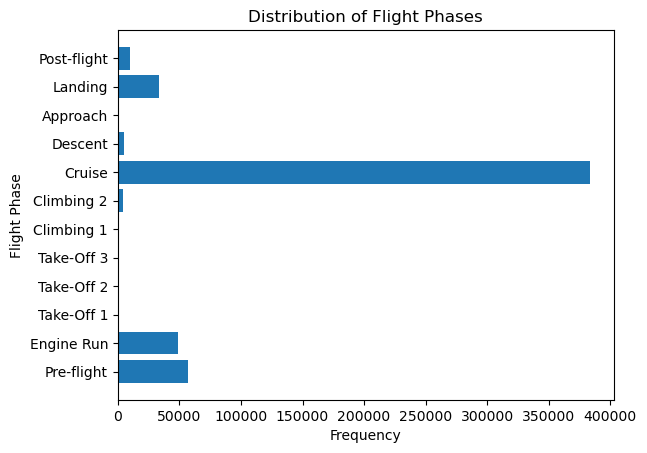

In [21]:
import matplotlib.pyplot as plt

# Define mapping of numbers to flight phase names
flight_phase_labels = [
    "Pre-flight", "Engine Run", "Take-Off 1", "Take-Off 2", "Take-Off 3", 
    "Climbing 1", "Climbing 2", "Cruise", "Descent", "Approach", "Landing", "Post-flight"
]

# Count occurrences of each phase number
flight_phase_counts = df02['FLIGHT_PHASE_COUNT'].value_counts().sort_index()

# Plot bar chart
plt.barh(flight_phase_labels, flight_phase_counts.values)

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Flight Phase")
plt.title("Distribution of Flight Phases")

plt.show()


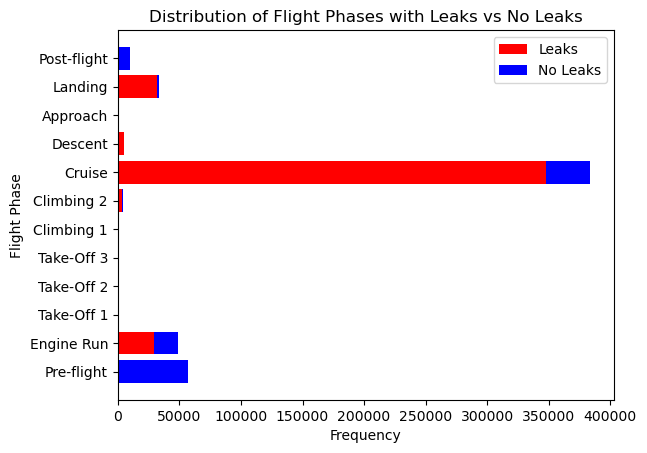

In [22]:
import matplotlib.pyplot as plt

# Define mapping of numbers to flight phase names
flight_phase_labels = [
    "Pre-flight", "Engine Run", "Take-Off 1", "Take-Off 2", "Take-Off 3", 
    "Climbing 1", "Climbing 2", "Cruise", "Descent", "Approach", "Landing", "Post-flight"
]

# Filter data into leaks and no-leaks categories based on 'LEAK_DETECTION_LEAK_FLOW'
leaks = df02[df02['LEAK_DETECTION_LEAK_FLOW'] != 0]
no_leaks = df02[df02['LEAK_DETECTION_LEAK_FLOW'] == 0]

# Count occurrences of each phase number for leaks and no leaks
leaks_phase_counts = leaks['FLIGHT_PHASE_COUNT'].value_counts().sort_index()
no_leaks_phase_counts = no_leaks['FLIGHT_PHASE_COUNT'].value_counts().sort_index()

# Plot stacked horizontal bar chart
plt.barh(flight_phase_labels, leaks_phase_counts.values, color='red', label='Leaks')
plt.barh(flight_phase_labels, no_leaks_phase_counts.values, left=leaks_phase_counts.values, color='blue', label='No Leaks')

# Labels and title
plt.xlabel("Frequency")
plt.ylabel("Flight Phase")
plt.title("Distribution of Flight Phases with Leaks vs No Leaks")

# Add legend
plt.legend()

plt.show()


# Calculating Fuel Discrepancy

In [23]:
df02_sorted = df02.sort_values(by=["MSN", "Flight", "UTC_TIME"])
df02_sorted.head()

,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,FUEL_FLOW_3,...,STATE_FUEL_QTY_ACCURACY_LST_DEGRADED,STATE_FUEL_QTY_ACCURACY_RST_DEGRADED,STATUS_FUEL_QTY_PART_UNUSABLE_LST,STATUS_FUEL_QTY_PART_UNUSABLE_RST,STATUS_FUEL_QTY_UNUSABLE_LST,STATUS_FUEL_QTY_UNUSABLE_RST,STATUS_OVERFLOW_LST,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2010-10-26 12:56:13,A400M-0002,V0094,True,True,True,True,NaN,NaN,NaN,NaN,...,True,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-26 12:56:14,A400M-0002,V0094,False,False,False,False,NaN,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,38.22030,0.0
2010-10-26 12:56:15,A400M-0002,V0094,False,False,False,False,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,38.25003,0.0
2010-10-26 12:56:16,A400M-0002,V0094,False,False,False,False,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,38.59469,0.0
2010-10-26 12:56:17,A400M-0002,V0094,False,False,False,False,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,38.70570,0.0


In [24]:
df02_sorted.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 547152 entries, 2010-10-26 12:56:13 to 2017-01-23 20:28:34
Data columns (total 106 columns):
 #    Column                                Non-Null Count   Dtype  
---   ------                                --------------   -----  
 0    MSN                                   547152 non-null  object 
 1    Flight                                547152 non-null  object 
 2    ENGINE_RUNNING_1                      547152 non-null  bool   
 3    ENGINE_RUNNING_2                      547152 non-null  bool   
 4    ENGINE_RUNNING_3                      547152 non-null  bool   
 5    ENGINE_RUNNING_4                      547152 non-null  bool   
 6    FLIGHT_PHASE_COUNT                    547058 non-null  float64
 7    FUEL_FLOW_1                           503755 non-null  float64
 8    FUEL_FLOW_2                           504926 non-null  float64
 9    FUEL_FLOW_3                           504931 non-null  float64
 10   FUEL_FLOW_4         

In [25]:
pd.options.display.max_rows = None
df02_sorted.isnull().sum()


MSN                                          0
Flight                                       0
ENGINE_RUNNING_1                             0
ENGINE_RUNNING_2                             0
ENGINE_RUNNING_3                             0
ENGINE_RUNNING_4                             0
FLIGHT_PHASE_COUNT                          94
FUEL_FLOW_1                              43397
FUEL_FLOW_2                              42226
FUEL_FLOW_3                              42221
FUEL_FLOW_4                              43622
FUEL_PITCH                                 390
FUEL_ROLL                                  390
FUEL_TRANSFER_MODE_VALUE                   312
FUEL_USED_1                              43390
FUEL_USED_2                              42220
FUEL_USED_3                              42219
FUEL_USED_4                              43620
FW_GEO_ALTITUDE                             68
LEAK_DETECTION_LEAK_FLOW                   401
LSTU1_A_VOLUME                             381
LSTU1_F_VOLUM

### Filling in missing values based on assumptions

In [26]:
# Fill zero where missing means "not active"
zero_fill_cols = ["FUEL_FLOW_1", "FUEL_FLOW_2", "FUEL_FLOW_3", "FUEL_FLOW_4", 
                  "FUEL_USED_1", "FUEL_USED_2", "FUEL_USED_3", "FUEL_USED_4", 
                  "STATE_PMP_MAIN_FT1_ON", "STATE_PMP_MAIN_FT2_ON", "STATE_PMP_MAIN_FT3_ON", "STATE_PMP_MAIN_FT4_ON"]

df02_sorted[zero_fill_cols] = df02_sorted[zero_fill_cols].fillna(0)

# Forward fill fuel levels
fuel_cols = ["VALUE_FUEL_QTY_FT1", "VALUE_FUEL_QTY_FT2", "VALUE_FUEL_QTY_FT3", "VALUE_FUEL_QTY_FT4", 
             "VALUE_FUEL_QTY_LXT", "VALUE_FUEL_QTY_RXT", "VALUE_FOB"]
df02_sorted[fuel_cols] = df02_sorted[fuel_cols].ffill()

# Interpolate altitude, pitch, roll
interp_cols = ["FW_GEO_ALTITUDE", "PITCH_ANGLE", "ROLL_ANGLE"]
df02_sorted[interp_cols] = df02_sorted[interp_cols].interpolate(method='linear')

# Fill fuel density with median
df02_sorted["EF1_Density"] = df02_sorted["EF1_Density"].fillna(df02_sorted["EF1_Density"].median())
df02_sorted["EF4_Density"] = df02_sorted["EF4_Density"].fillna(df02_sorted["EF4_Density"].median())

# Leave NaN in leak detection for analysis


In [27]:
import pandas as pd

# Assume df02_sorted is the dataframe you're working with

# 1. Fill FLIGHT_PHASE_COUNT missing values with forward-fill (ffill) or backward-fill (bfill)
df02_sorted['FLIGHT_PHASE_COUNT'] = df02_sorted['FLIGHT_PHASE_COUNT'].fillna(method='ffill')

# 2. Fill FUEL_PITCH and FUEL_ROLL missing values with forward-fill or linear interpolation
df02_sorted['FUEL_PITCH'] = df02_sorted['FUEL_PITCH'].fillna(method='ffill')  # or df02_sorted['FUEL_PITCH'].interpolate()
df02_sorted['FUEL_ROLL'] = df02_sorted['FUEL_ROLL'].fillna(method='ffill')  # or df02_sorted['FUEL_ROLL'].interpolate()

# 3. Fill FUEL_TRANSFER_MODE_VALUE missing values with forward-fill or mode-based filling
df02_sorted['FUEL_TRANSFER_MODE_VALUE'] = df02_sorted['FUEL_TRANSFER_MODE_VALUE'].fillna(method='ffill')

# 4. Fill FW_GEO_ALTITUDE missing values with forward-fill or linear interpolation
df02_sorted['FW_GEO_ALTITUDE'] = df02_sorted['FW_GEO_ALTITUDE'].fillna(method='ffill')  # or df02_sorted['FW_GEO_ALTITUDE'].interpolate()

# 5. Fill LEAK_DETECTION_LEAK_FLOW missing values with zero (no leak detected)
df02_sorted['LEAK_DETECTION_LEAK_FLOW'] = df02_sorted['LEAK_DETECTION_LEAK_FLOW'].fillna(0)

# 6. Fill LSTU1_A_VOLUME, LSTU1_F_VOLUME, RSTU1_A_VOLUME, RSTU1_F_VOLUME missing values with forward-fill or linear interpolation
df02_sorted['LSTU1_A_VOLUME'] = df02_sorted['LSTU1_A_VOLUME'].fillna(method='ffill')
df02_sorted['LSTU1_F_VOLUME'] = df02_sorted['LSTU1_F_VOLUME'].fillna(method='ffill')
df02_sorted['RSTU1_A_VOLUME'] = df02_sorted['RSTU1_A_VOLUME'].fillna(method='ffill')
df02_sorted['RSTU1_F_VOLUME'] = df02_sorted['RSTU1_F_VOLUME'].fillna(method='ffill')

# 7. Fill SELECTED_GADIR_ALTITUDE_VALUE missing values with forward-fill or linear interpolation
df02_sorted['SELECTED_GADIR_ALTITUDE_VALUE'] = df02_sorted['SELECTED_GADIR_ALTITUDE_VALUE'].fillna(method='ffill')

# 8. Fill VALUE_FOB missing values with forward-fill (or bfill)
df02_sorted['VALUE_FOB'] = df02_sorted['VALUE_FOB'].fillna(method='ffill')

# 9. Fill VALUE_FUEL_QTY_CC1, VALUE_FUEL_QTY_CC2, VALUE_FUEL_QTY_CC3, VALUE_FUEL_QTY_CC4 missing values with forward-fill (or linear interpolation)
df02_sorted['VALUE_FUEL_QTY_CC1'] = df02_sorted['VALUE_FUEL_QTY_CC1'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_CC2'] = df02_sorted['VALUE_FUEL_QTY_CC2'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_CC3'] = df02_sorted['VALUE_FUEL_QTY_CC3'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_CC4'] = df02_sorted['VALUE_FUEL_QTY_CC4'].fillna(method='ffill')

# 10. Fill VALUE_FUEL_QTY_CT missing values with forward-fill (or linear interpolation)
df02_sorted['VALUE_FUEL_QTY_CT'] = df02_sorted['VALUE_FUEL_QTY_CT'].fillna(method='ffill')

# 11. Fill VALUE_FUEL_QTY_FT1, VALUE_FUEL_QTY_FT2, VALUE_FUEL_QTY_FT3, VALUE_FUEL_QTY_FT4 missing values with forward-fill (or linear interpolation)
df02_sorted['VALUE_FUEL_QTY_FT1'] = df02_sorted['VALUE_FUEL_QTY_FT1'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_FT2'] = df02_sorted['VALUE_FUEL_QTY_FT2'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_FT3'] = df02_sorted['VALUE_FUEL_QTY_FT3'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_FT4'] = df02_sorted['VALUE_FUEL_QTY_FT4'].fillna(method='ffill')

# 12. Fill VALUE_FUEL_QTY_LXT, VALUE_FUEL_QTY_RXT missing values with forward-fill (or linear interpolation)
df02_sorted['VALUE_FUEL_QTY_LXT'] = df02_sorted['VALUE_FUEL_QTY_LXT'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_QTY_RXT'] = df02_sorted['VALUE_FUEL_QTY_RXT'].fillna(method='ffill')

# 13. Fill APU_FUEL_FLOW_REQUEST_SIGNAL_1 missing values with zero (no fuel flow request)
df02_sorted['APU_FUEL_FLOW_REQUEST_SIGNAL_1'] = df02_sorted['APU_FUEL_FLOW_REQUEST_SIGNAL_1'].fillna(0)

# 14. Fill STATUS_FUEL_QTY_PART_UNUSABLE_LST, STATUS_FUEL_QTY_PART_UNUSABLE_RST, STATUS_FUEL_QTY_UNUSABLE_LST, STATUS_FUEL_QTY_UNUSABLE_RST missing values with zero (no unusable fuel)
df02_sorted['STATUS_FUEL_QTY_PART_UNUSABLE_LST'] = df02_sorted['STATUS_FUEL_QTY_PART_UNUSABLE_LST'].fillna(0)
df02_sorted['STATUS_FUEL_QTY_PART_UNUSABLE_RST'] = df02_sorted['STATUS_FUEL_QTY_PART_UNUSABLE_RST'].fillna(0)
df02_sorted['STATUS_FUEL_QTY_UNUSABLE_LST'] = df02_sorted['STATUS_FUEL_QTY_UNUSABLE_LST'].fillna(0)
df02_sorted['STATUS_FUEL_QTY_UNUSABLE_RST'] = df02_sorted['STATUS_FUEL_QTY_UNUSABLE_RST'].fillna(0)

# 15. Fill STATUS_OVERFLOW_LST, STATUS_OVERFLOW_RST missing values with zero (no overflow detected)
df02_sorted['STATUS_OVERFLOW_LST'] = df02_sorted['STATUS_OVERFLOW_LST'].fillna(0)
df02_sorted['STATUS_OVERFLOW_RST'] = df02_sorted['STATUS_OVERFLOW_RST'].fillna(0)

# 16. Fill VALUE_FUEL_VOL_LST, VALUE_FUEL_VOL_RST missing values with forward-fill (or linear interpolation)
df02_sorted['VALUE_FUEL_VOL_LST'] = df02_sorted['VALUE_FUEL_VOL_LST'].fillna(method='ffill')
df02_sorted['VALUE_FUEL_VOL_RST'] = df02_sorted['VALUE_FUEL_VOL_RST'].fillna(method='ffill')

# At this point, the missing values should be filled in the dataframe 'df02_sorted'.


/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_4228/2664369694.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df02_sorted['FLIGHT_PHASE_COUNT'] = df02_sorted['FLIGHT_PHASE_COUNT'].fillna(method='ffill')
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_4228/2664369694.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df02_sorted['FUEL_PITCH'] = df02_sorted['FUEL_PITCH'].fillna(method='ffill')  # or df02_sorted['FUEL_PITCH'].interpolate()
/var/folders/7z/04vv5sm111vfjsrfpsl2fw6c0000gn/T/ipykernel_4228/2664369694.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df02_sorted['FUEL_ROLL'] = df02_sorted['FUEL_ROLL'].fillna(method='ffill')  # or df02_sorted['FUEL_ROLL'].interpolate()
/var/folders/7z

In [28]:
df02_sorted = df02_sorted.dropna()

In [29]:
df02_sorted.isnull().sum()

MSN                                     0
Flight                                  0
ENGINE_RUNNING_1                        0
ENGINE_RUNNING_2                        0
ENGINE_RUNNING_3                        0
ENGINE_RUNNING_4                        0
FLIGHT_PHASE_COUNT                      0
FUEL_FLOW_1                             0
FUEL_FLOW_2                             0
FUEL_FLOW_3                             0
FUEL_FLOW_4                             0
FUEL_PITCH                              0
FUEL_ROLL                               0
FUEL_TRANSFER_MODE_VALUE                0
FUEL_USED_1                             0
FUEL_USED_2                             0
FUEL_USED_3                             0
FUEL_USED_4                             0
FW_GEO_ALTITUDE                         0
LEAK_DETECTION_LEAK_FLOW                0
LSTU1_A_VOLUME                          0
LSTU1_F_VOLUME                          0
PITCH_ANGLE                             0
ROLL_ANGLE                        

In [30]:
# Ensure 'UTC_TIME' is in datetime format (if not already)
df02_sorted.index = pd.to_datetime(df02_sorted.index, errors='coerce')

# Get the minimum and maximum dates from the index
min_date = df02_sorted.index.min()
max_date = df02_sorted.index.max()

print(min_date, max_date)

2010-10-26 12:56:15 2017-01-23 20:28:34


In [32]:
# Now filter for data from 2015 onwards
df_2016 = df02_sorted.loc[df02_sorted.index >= '2016-01-01']

In [35]:
len(df02_sorted)

547150

In [34]:
len(df_2016)

231306

In [33]:
df_2016.head()

,MSN,Flight,ENGINE_RUNNING_1,ENGINE_RUNNING_2,ENGINE_RUNNING_3,ENGINE_RUNNING_4,FLIGHT_PHASE_COUNT,FUEL_FLOW_1,FUEL_FLOW_2,FUEL_FLOW_3,...,STATE_FUEL_QTY_ACCURACY_LST_DEGRADED,STATE_FUEL_QTY_ACCURACY_RST_DEGRADED,STATUS_FUEL_QTY_PART_UNUSABLE_LST,STATUS_FUEL_QTY_PART_UNUSABLE_RST,STATUS_FUEL_QTY_UNUSABLE_LST,STATUS_FUEL_QTY_UNUSABLE_RST,STATUS_OVERFLOW_LST,STATUS_OVERFLOW_RST,VALUE_FUEL_VOL_LST,VALUE_FUEL_VOL_RST
UTC_TIME,,,,,,,,,,,,,,,,,,,,,
2016-03-08 10:18:15,A400M-0002,V0833,True,True,True,True,12.0,0.0,0.0,0.0,...,True,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-08 10:18:16,A400M-0002,V0833,True,True,True,True,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-08 10:18:17,A400M-0002,V0833,True,True,True,True,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-08 10:18:18,A400M-0002,V0833,True,True,True,True,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-03-08 10:18:19,A400M-0002,V0833,True,True,True,True,1.0,0.0,0.0,0.0,...,False,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# Create a subset with the relevant columns
fuel_df = df02_sorted[[
    'MSN', 'Flight', 'FUEL_USED_1', 'FUEL_USED_2', 'FUEL_USED_3', 'FUEL_USED_4',
    'VALUE_FUEL_QTY_FT1', 'VALUE_FUEL_QTY_FT2', 'VALUE_FUEL_QTY_FT3', 'VALUE_FUEL_QTY_FT4',
    'VALUE_FUEL_QTY_LXT', 'VALUE_FUEL_QTY_RXT', 'VALUE_FOB'
]]

fuel_df

KeyboardInterrupt: 

In [ ]:
# Compute total fuel used at each timestamp
subset_df["Total_Fuel_Used"] = subset_df["FUEL_USED_1"] + subset_df["FUEL_USED_2"] + \
                               subset_df["FUEL_USED_3"] + subset_df["FUEL_USED_4"]

# Compute total fuel remaining in all tanks
subset_df["Total_Fuel_Remaining"] = (subset_df["VALUE_FUEL_QTY_FT1"] + subset_df["VALUE_FUEL_QTY_FT2"] + 
                                      subset_df["VALUE_FUEL_QTY_FT3"] + subset_df["VALUE_FUEL_QTY_FT4"] + 
                                      subset_df["VALUE_FUEL_QTY_LXT"] + subset_df["VALUE_FUEL_QTY_RXT"])

# Calculate fuel discrepancy
subset_df["Fuel_Discrepancy"] = subset_df["VALUE_FOB"] - (subset_df["Total_Fuel_Used"] + subset_df["Total_Fuel_Remaining"])

# Define a threshold for potential leak detection (e.g., a large discrepancy)
leak_threshold = 500  # This threshold can be adjusted

# Identify rows where the fuel discrepancy is greater than the threshold (potential leak)
subset_df["Potential_Leak"] = subset_df["Fuel_Discrepancy"].abs() > leak_threshold

# Display suspected leak events (optional)
suspected_leaks = subset_df[subset_df["Potential_Leak"]]

# Print the suspected leaks with the relevant information
print(suspected_leaks[["Flight", "Fuel_Discrepancy", "Potential_Leak"]])
